In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D,LeakyReLU
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras

In [2]:
data_test = pd.read_csv('data/fashion-mnist_test.csv')
df_test = pd.DataFrame(data_test)

In [3]:
data_train = pd.read_csv('data/fashion-mnist_train.csv')
df_train = pd.DataFrame(data_test)

### Setting X & y

In [4]:
X = df_train.drop('label',axis=1)
y = df_train['label']

In [5]:
y.value_counts().count()

10

### Normalize Data

In [6]:
X = X/255

### Split X and y into train and test subsets.


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2,random_state=2023)

In [8]:
X_train.shape , y_train.shape

((8000, 784), (8000,))

In [9]:
X_train_cnn = X_train.values.reshape(-1,28,28,1)
X_val_cnn = X_val.values.reshape(-1,28,28,1)

In [10]:
X_train_cnn.shape[1:]

(28, 28, 1)

### Create Network

#### Convolutional NN

In [12]:
model = Sequential([
    Conv2D(64,(3,3), activation=LeakyReLU(alpha=0.05), input_shape = (X_train_cnn.shape[1:])),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(10,activation = 'softmax') # there are 10 unique values in y
])  

Metal device set to: Apple M1 Max


2023-03-17 09:09:40.083271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-17 09:09:40.083386: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Train your network

In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'],
)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [15]:
history = model.fit(
    X_train_cnn,
    y_train,
    validation_data=(X_val_cnn, y_val),
    batch_size = 32,
    epochs = 15,
    verbose= 1,
    callbacks=[early_stopping]
)

Epoch 1/15


2023-03-17 09:09:40.230236: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-17 09:09:40.347125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


246/250 [============================>.] - ETA: 0s - loss: 0.8225 - accuracy: 0.7176

2023-03-17 09:09:42.265597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 2s 8ms/step - loss: 0.8194 - accuracy: 0.7180 - val_loss: 0.5070 - val_accuracy: 0.8175
Epoch 2/15
250/250 [==============================] - 2s 8ms/step - loss: 0.4906 - accuracy: 0.8255 - val_loss: 0.4256 - val_accuracy: 0.8595
Epoch 3/15
250/250 [==============================] - 2s 8ms/step - loss: 0.3989 - accuracy: 0.8595 - val_loss: 0.4024 - val_accuracy: 0.8615
Epoch 4/15
250/250 [==============================] - 2s 8ms/step - loss: 0.3606 - accuracy: 0.8728 - val_loss: 0.3943 - val_accuracy: 0.8630
Epoch 5/15
250/250 [==============================] - 2s 8ms/step - loss: 0.3220 - accuracy: 0.8873 - val_loss: 0.3466 - val_accuracy: 0.8835
Epoch 6/15
250/250 [==============================] - 2s 8ms/step - loss: 0.2906 - accuracy: 0.8933 - val_loss: 0.3516 - val_accuracy: 0.8790
Epoch 7/15
250/250 [==============================] - 2s 8ms/step - loss: 0.2706 - accuracy: 0.9033 - val_loss: 0.3525 - val_accuracy: 0.8880
Epoch 8/15
250/25

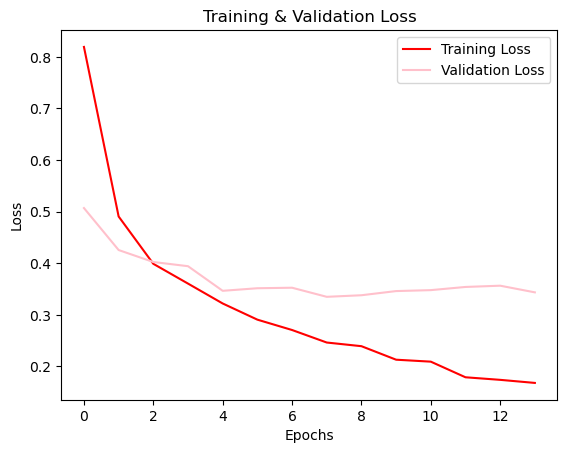

In [89]:
plt.plot(history.epoch, history.history['loss'], c='r',label = 'Training Loss');    
plt.plot(history.epoch, history.history['val_loss'], c='pink', label = 'Validation Loss');
plt.yscale('linear')

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

### Running Model on All Data

In [17]:
X_cnn = X.values.reshape(-1,28,28,1)


In [18]:
model_all = Sequential([
    Conv2D(64,(3,3), activation=LeakyReLU(alpha=0.05), input_shape = (X_cnn.shape[1:])),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.6),
    Dense(10,activation = 'softmax') # there are 10 unique values in y
])  

In [19]:
model_all.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy'],
)

In [20]:
history_all = model_all.fit(
    X_cnn,
    y,
    batch_size = 32,
    epochs = 15,
    verbose= 1,
    callbacks=[early_stopping]
)

Epoch 1/15
  5/313 [..............................] - ETA: 4s - loss: 2.2152 - accuracy: 0.1750  

2023-03-17 09:11:14.094806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.8011 - accuracy: 0.7246
Epoch 2/15
313/313 [==============================] - 2s 8ms/step - loss: 0.5012 - accuracy: 0.8235
Epoch 3/15
313/313 [==============================] - 2s 8ms/step - loss: 0.4062 - accuracy: 0.8556
Epoch 4/15
313/313 [==============================] - 2s 8ms/step - loss: 0.3601 - accuracy: 0.8731
Epoch 5/15
313/313 [==============================] - 2s 8ms/step - loss: 0.3305 - accuracy: 0.8858
Epoch 6/15
313/313 [==============================] - 2s 8ms/step - loss: 0.2893 - accuracy: 0.8959
Epoch 7/15
313/313 [==============================] - 2s 8ms/step - loss: 0.2629 - accuracy: 0.9031
Epoch 8/15
313/313 [==============================] - 2s 8ms/step - loss: 0.2444 - accuracy: 0.9148
Epoch 9/15
313/313 [==============================] - 2s 8ms/step - loss: 0.2286 - accuracy: 0.9163
Epoch 10/15
313/313 [==============================] - 2s 8ms/step - loss: 0.2099 - accuracy: 0.9247
Epoch 11/1

#### Making Predictions

In [39]:
X_test = df_test.drop('label',axis =1)

In [40]:
X_test_cnn = X_test.values.reshape(-1,28,28,1)

In [41]:
predictions = model_all.predict(X_test_cnn)

 65/313 [=====>........................] - ETA: 0s

2023-03-17 09:22:26.918509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [42]:
X_test['Predictions'] = np.argmax(predictions,axis=1)

In [43]:
X_test.to_csv('data/submission.csv',index= False)

### Visualizations

In [51]:
val_preds = np.argmax(model.predict(X_val_cnn),axis=1)
val_preds.shape

63/63 [==============================] - 0s 3ms/step


(2000,)

In [52]:
val_preds.shape

(2000,)

In [57]:
val_preds

array([2, 0, 2, ..., 8, 0, 4])

In [61]:
val_preds.shape

(2000,)

In [65]:
X_val_cnn.shape

(2000, 28, 28, 1)

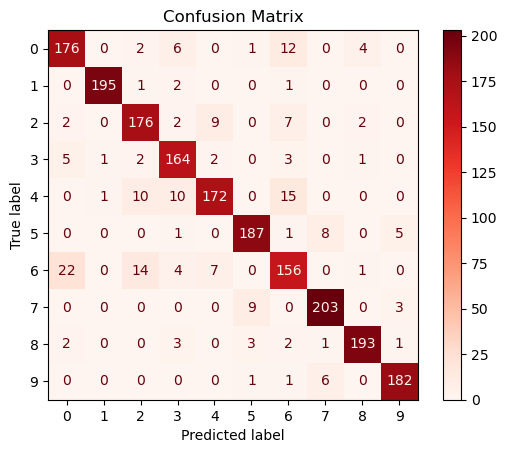

In [87]:
ConfusionMatrixDisplay.from_predictions(y_val, val_preds, cmap = 'Reds');
plt.title("Confusion Matrix")
plt.savefig('images/conf_matrix.png')

In [101]:
y_train.label[12]

AttributeError: 'Series' object has no attribute 'label'

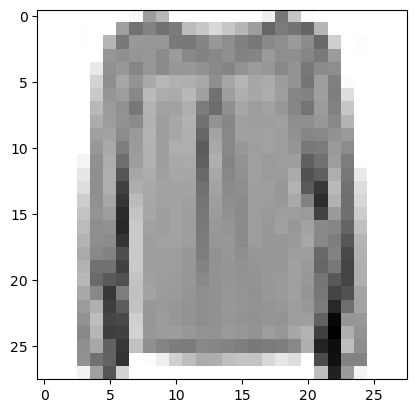

In [94]:
plt.imshow(X_train_cnn[12],cmap = 'binary')
plt.title('Blouse')

In [112]:
y_val.reset_index().drop('index',axis=1)

,label
0,4
1,0
2,2
3,5
4,4
...,...
1995,4
1996,6
1997,8
1998,0


In [121]:
y_val = np.array(y_val)

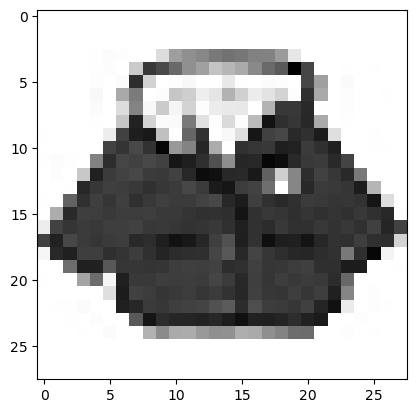

We thought = 2, but really 4


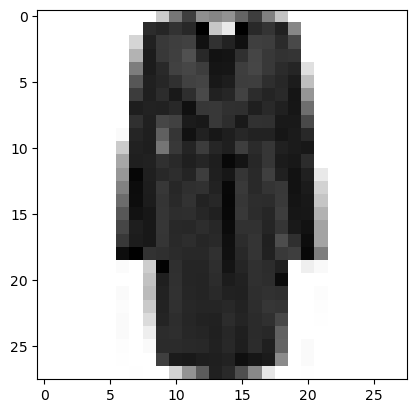

We thought = 3, but really 4


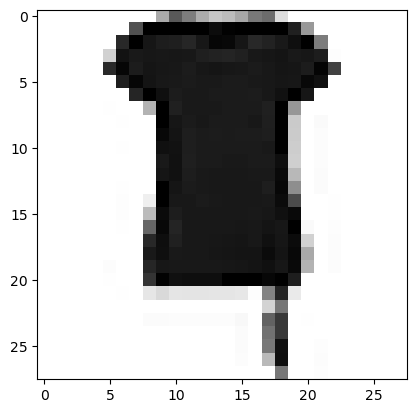

We thought = 3, but really 0


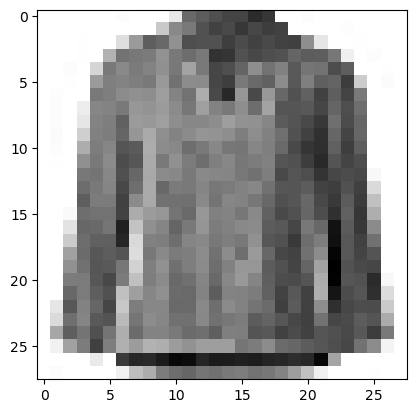

We thought = 4, but really 6


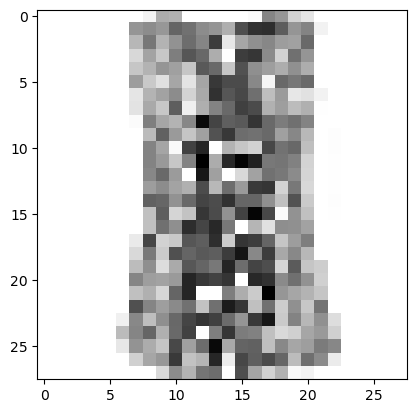

We thought = 3, but really 0


In [124]:
wrong_ix = np.where(val_preds != y_val)[0]
for i in wrong_ix[:5]:
    plt.clf()
    plt.imshow(X_val_cnn[i], cmap='binary')
    plt.show()
    pred = val_preds[i]
    truth = y_val[i]
    print(f'We thought = {pred}, but really {truth}')